**Exercícios Rotulação de Componentes Conexos**
exercícios obtidos em http://homepages.inf.ed.ac.uk/rbf/HIPR2/label.htm


1. Implemente o algoritmo de rotulação de componentes conexos (algoritmo do slide ou por outra solução) e aplique sobre a imagem binária art8.png. Indique qual vizinhança será considerada (4 ou 8)
Mostre os resultados na forma da imagem art8lab1.png e art8lab2.png

art8.png: 
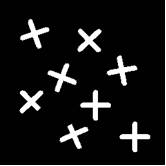
art8lab1.png: 
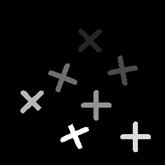
art8lab2.png: 
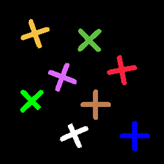
		

In [4]:
pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install opencv-python


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Tamanho da imagem :  (256, 256)


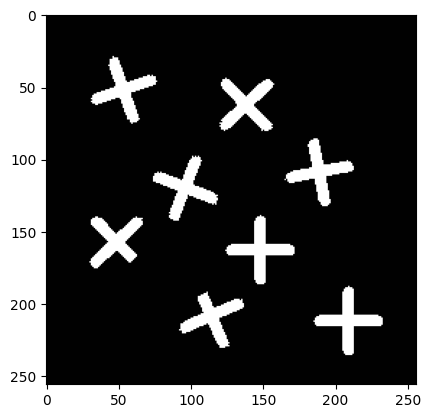

In [105]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("art8.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray', vmin=0, vmax=255);

print('Tamanho da imagem : ',img.shape)
# convertendo para 300dpi

linhas = img.shape[0]
colunas = img.shape[1];

In [93]:
def componentesConexas(img):
    dim = img.shape
    aux = np.zeros(img.shape)
    count = 1
    equv = []
    for i in range(1,dim[0]):
        for j in range(1,dim[1]):
            p = img[i,j]
            r = img[i,j-1]
            t = img[i-1,j]
            if p == 1:
                if r == 0 and t == 0 :
                    aux[i,j] = count
                    count = count + 1
                elif r == 1 and t == 0 :
                    aux[i,j] = aux[i,j-1]
                elif r == 0 and t == 1:
                    aux[i,j] = aux[i-1,j]
                elif ((r + t) == 2) and (aux[i,j-1] == aux[i-1,j]) :
                    aux[i,j] = aux[i,j-1]
                else:
                    aux[i,j] = aux[i,j-1]
                    equv.append([aux[i,j-1],aux[i-1,j]])
                    equv.append([aux[i-1,j],aux[i,j-1]])
    return aux, equv

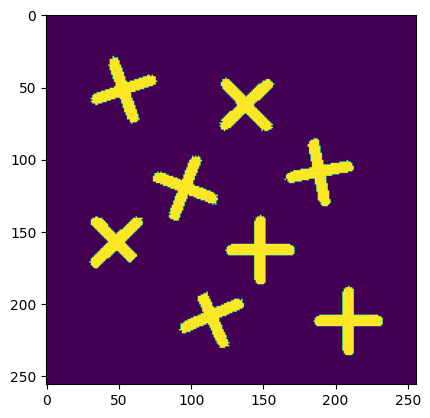

In [106]:
plt.imshow(img)

In [125]:
def associated_Nodes(node, edges):
    index = edges[:,0] == node
    associatedNodes = np.unique(edges[index,1]).tolist()
    return associatedNodes

def isElementInList(node, listNodes):
    var = False
    for i in listNodes:
        if node == i:
            var=True
    return var

def deleteFromList(listAll, listSelected):
    temp = listAll
    for i in listSelected:
        if isElementInList(i,listAll):
            temp.remove(i)
    return temp

def getGroupsOfLabels(equivalences):
    equiv = np.array(equivalences)
    groups = []
    uniqueIndex = np.unique(equiv[:,0]).tolist()

    for node in uniqueIndex:
        subgroup_list = []
        subgroup_list.append(node)
        for subgroupElement in subgroup_list:
            associatedNodes = associated_Nodes(subgroupElement, equiv)
            for assoNode in associatedNodes:
                if isElementInList(assoNode, subgroup_list)==False:
                    subgroup_list.append(assoNode)
        groups.append(subgroup_list)
        uniqueIndex = deleteFromList(uniqueIndex, subgroup_list)
        
    return groups

def generateColor(max_colors, index):
    # Asegurarse de que el índice esté en el rango [0, max_colores - 1]
    indice = max(0, min(max_colors - 1, index))

    r = int(255 * (index / max_colors))
    g = int(255 * ((index + max_colors // 3) / max_colors) % 256)
    b = int(255 * ((index + 2 * max_colors // 3) / max_colors) % 256)

    return np.array([r, g, b])

In [180]:
def assigLabelsToImage(img):
    newImg = np.ones((img.shape[0],img.shape[1],3), 'uint8')*255
    temp, equivalencias = componentesConexas(img)
    groups = getGroupsOfLabels(equivalencias)
    for i in range(0,img.shape[0]):
        for j in range(0,img.shape[1]):
            #identificar grupo
            node = temp[i,j]
            indexColor = 0
            for k in range(0,len(groups)):
                if isElementInList(node, groups[k]):
                    indexColor = k
                    break
            newColor = generateColor(len(groups), k)
            newImg[i,j,:] = newColor
    return newImg
    

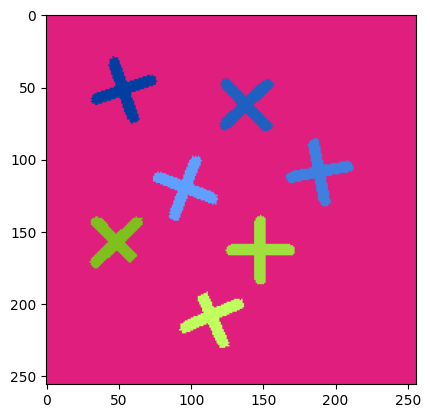

In [131]:
img = np.round(img/255)
tempImg = assigLabelsToImage(img)
plt.imshow(tempImg)

In [68]:
equiv = np.array([[1,3],[1,4],[1,5],[2,7],[2,4],[2,3],[6,8],[8,9],[3,1],[4,1],[5,1],[7,2],[4,2],[3,2],[8,6],[9,8]])

In [113]:
groups = getGroupsOfLabels(equivalencias)
groups

[[1.0,
  2.0,
  3.0,
  12.0,
  18.0,
  9.0,
  20.0,
  7.0,
  22.0,
  6.0,
  24.0,
  4.0,
  5.0,
  26.0,
  28.0,
  30.0,
  32.0,
  33.0],
 [10.0,
  8.0,
  14.0,
  31.0,
  34.0,
  29.0,
  35.0,
  27.0,
  36.0,
  25.0,
  37.0,
  23.0,
  38.0,
  21.0,
  39.0,
  19.0,
  40.0,
  17.0,
  41.0,
  16.0,
  42.0,
  15.0,
  43.0,
  13.0,
  44.0,
  11.0,
  45.0],
 [48.0,
  47.0,
  49.0,
  46.0,
  58.0,
  60.0,
  56.0,
  61.0,
  55.0,
  63.0,
  66.0,
  68.0,
  70.0],
 [53.0,
  50.0,
  54.0,
  51.0,
  52.0,
  57.0,
  59.0,
  62.0,
  69.0,
  72.0,
  71.0,
  67.0,
  74.0,
  64.0,
  65.0,
  75.0,
  76.0,
  77.0,
  78.0,
  79.0,
  80.0],
 [85.0,
  82.0,
  88.0,
  99.0,
  100.0,
  98.0,
  101.0,
  97.0,
  103.0,
  96.0,
  105.0,
  95.0,
  107.0,
  94.0,
  108.0,
  93.0,
  110.0,
  92.0,
  111.0,
  90.0,
  112.0,
  89.0,
  113.0,
  86.0,
  114.0,
  83.0,
  115.0,
  116.0],
 [104.0, 102.0, 106.0, 91.0, 109.0, 87.0, 84.0, 81.0],
 [123.0,
  122.0,
  124.0,
  120.0,
  131.0,
  132.0,
  130.0,
  133.0,
  129.0,

2. Calcule o número de objetos da imagem clc3.png. Note que antes será necessário binarizar a imagem. Para isso, considere um limiar (*threshold*) de 67, isto é, valores acima de 67 na imagem original recebem zero, e os abaixo recebem 1 (o que resulta na imagem clc3thr1.png).

clc3.png
![clc3.png](clc3.png)
clc3thr1
![clc3thr1.png](clc3thr1.png)
clc3lab1
![clc3lab1.png](clc3lab1.png)
		

Tamanho da imagem :  (260, 200)


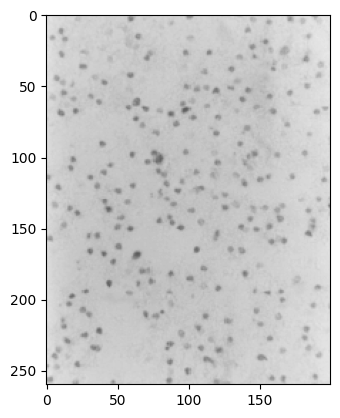

In [147]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("clc3.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray', vmin=0, vmax=255);

print('Tamanho da imagem : ',img.shape)
# convertendo para 300dpi

linhas = img.shape[0]
colunas = img.shape[1];

In [153]:
img.shape

(260, 200)

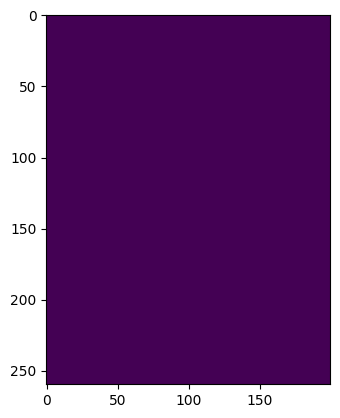

In [146]:
temp = (img < 67)*1
plt.imshow(temp)

In [171]:
# code here
def thresholdImage(img, threshold):
    tempImage = np.zeros(img.shape)
    for i in range(0,img.shape[0]):
        for j in range(0,img.shape[1]):
            if img[i,j] < threshold:
                tempImage[i,j] = 1
    return tempImage

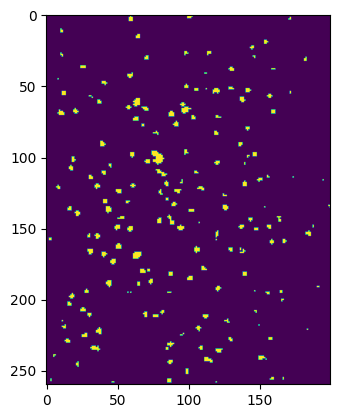

In [172]:
tempImg = thresholdImage(img, 157)
plt.imshow(tempImg)

In [178]:
 temp, equivalencias = componentesConexas(tempImg)
groups = getGroupsOfLabels(equivalencias)

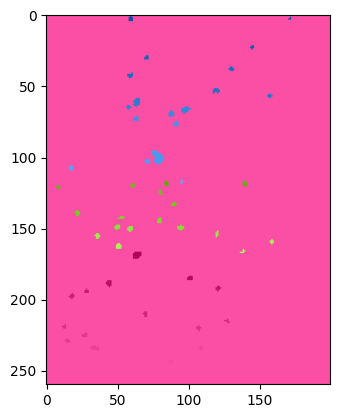

In [181]:
#img = np.round(img/255)
tempImg = assigLabelsToImage(tempImg)
plt.imshow(tempImg)